### Problem 1

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
### Loading nesscessary library for the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import os
os.chdir('C:\\Users\\WELCOME\\Downloads\\PYTHON FILES\\predictive modelling\\project')

In [4]:
df = pd.read_csv('cubic_zirconia.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
df.shape

(26967, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [9]:
### Data Description

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,NaN,NaN,NaN,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80


In [11]:
### Null value check 

In [12]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [13]:
# Percentage of missing values
100 * df.isnull().sum() / len(df)

Unnamed: 0    0.00000
carat         0.00000
cut           0.00000
color         0.00000
clarity       0.00000
depth         2.58464
table         0.00000
x             0.00000
y             0.00000
z             0.00000
price         0.00000
dtype: float64

In [14]:
### check for duplicates in data

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [16]:
### unique values for categorical variables

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [18]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

### Univariate / Bivariate analysis

Text(0.5, 1.0, 'x Distribution')

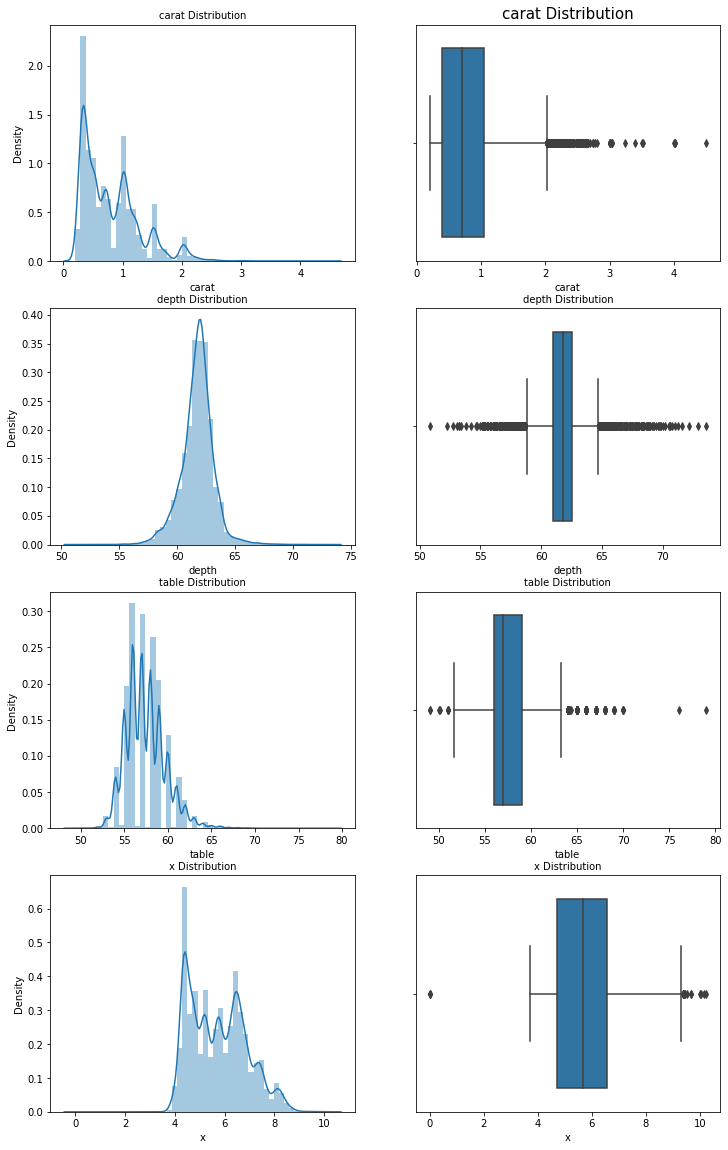

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

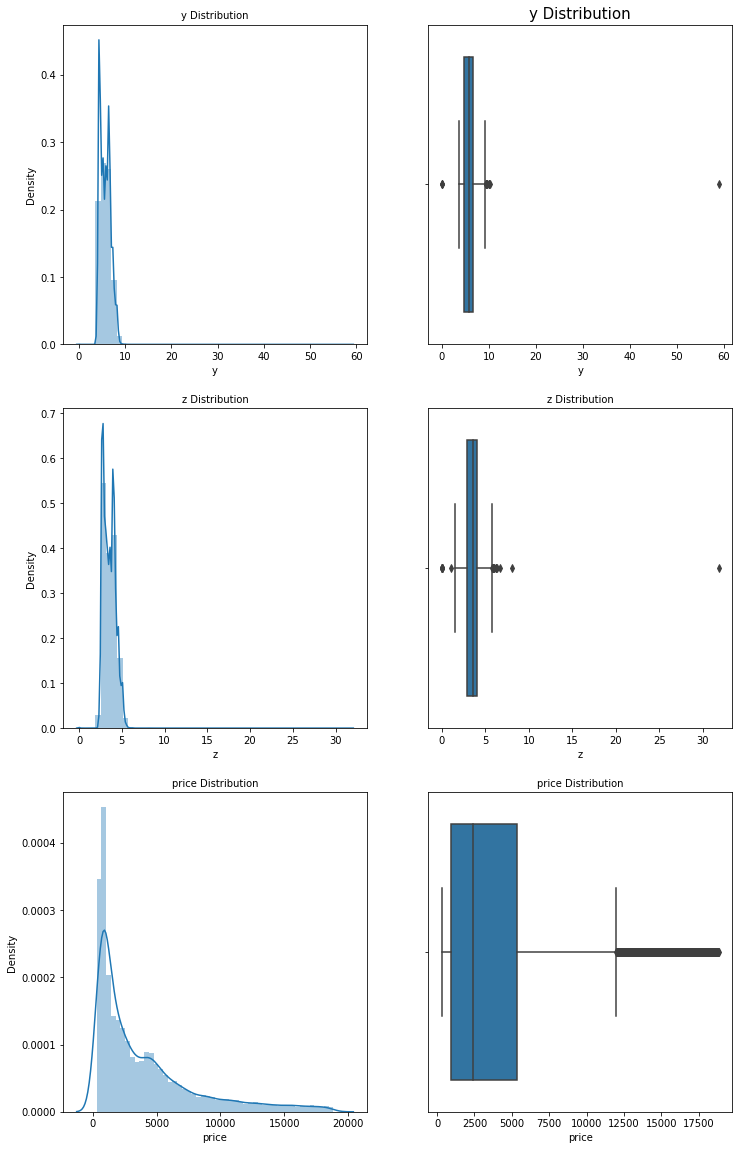

In [20]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

In [21]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [22]:
df.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

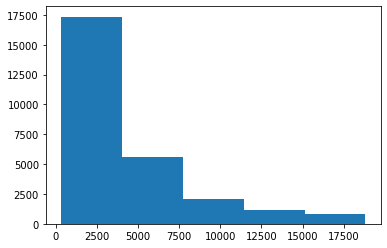

In [23]:
plt.hist(df.price, bins = 5)

plt.show()

### Categorical Variables

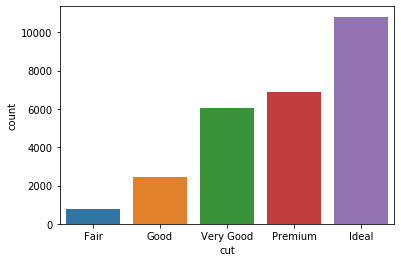

In [24]:

sns.countplot(df['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])


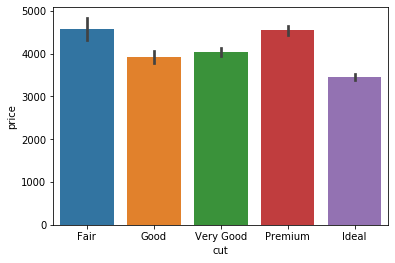

In [25]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

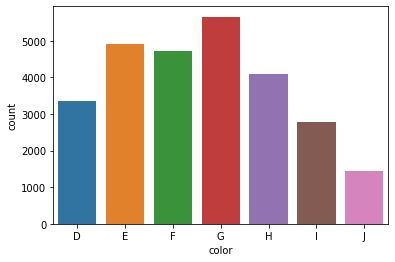

In [26]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

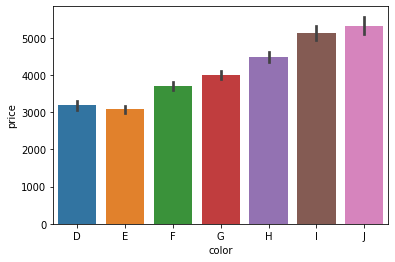

In [27]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

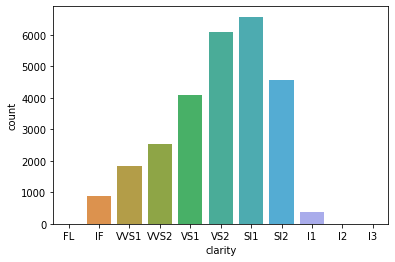

In [28]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

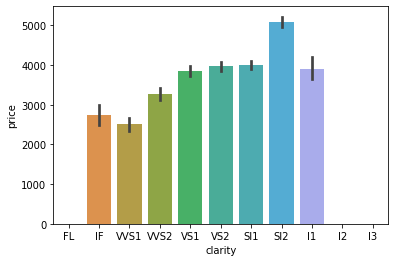

In [29]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [30]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


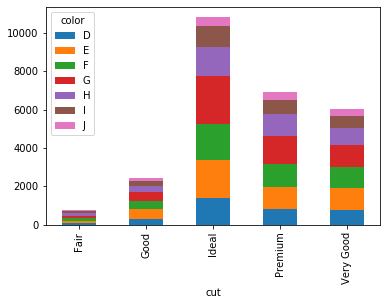

In [31]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

In [32]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


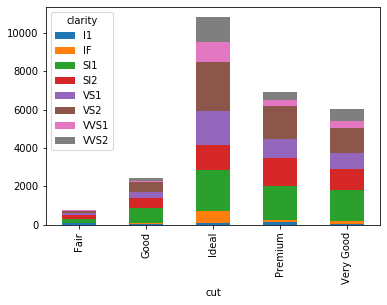

In [33]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

AttributeError: 'JointGrid' object has no attribute 'annotate'

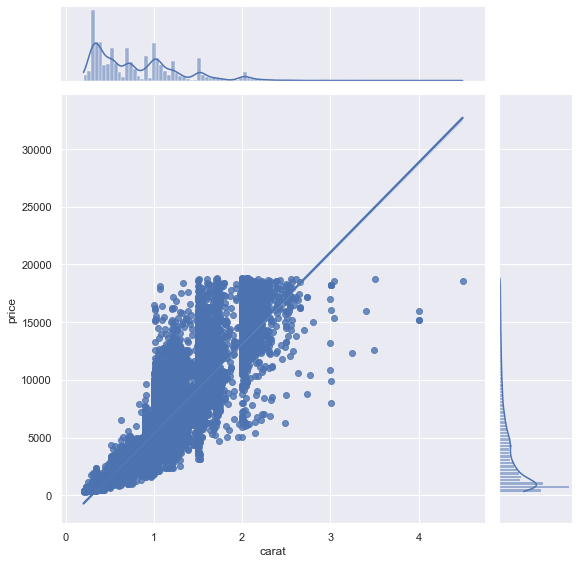

In [34]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('carat', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

AttributeError: 'JointGrid' object has no attribute 'annotate'

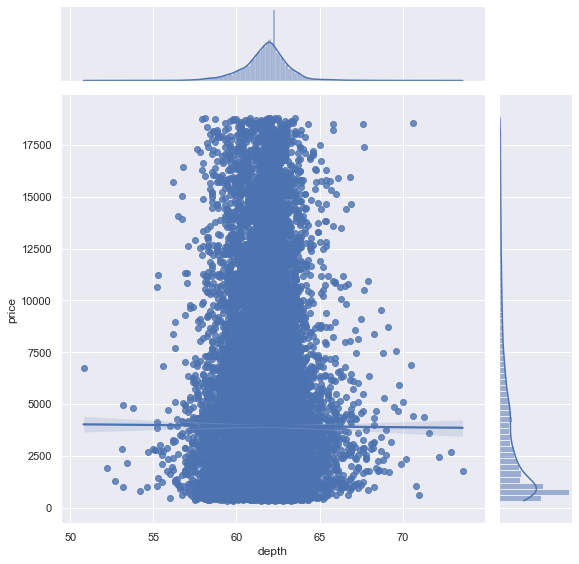

In [35]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

AttributeError: 'JointGrid' object has no attribute 'annotate'

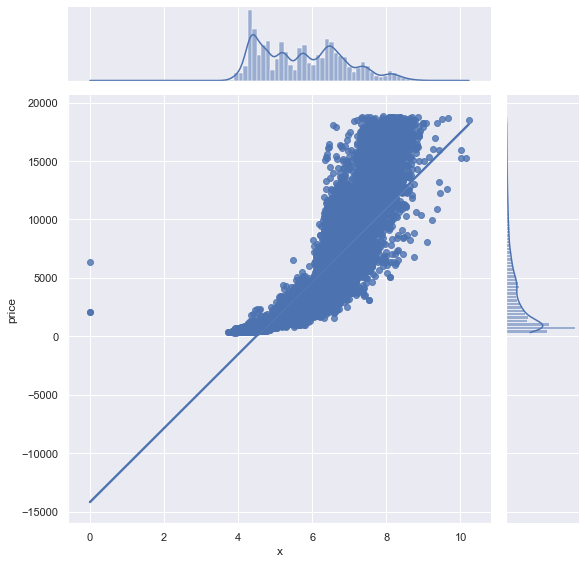

In [36]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('x', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

AttributeError: 'JointGrid' object has no attribute 'annotate'

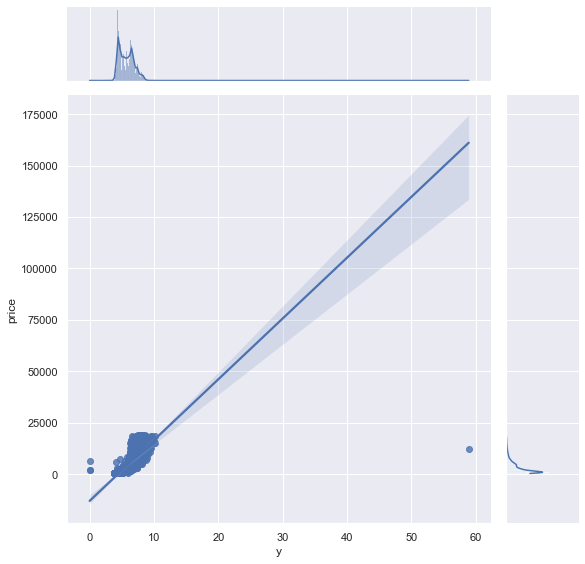

In [37]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('y', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

AttributeError: 'JointGrid' object has no attribute 'annotate'

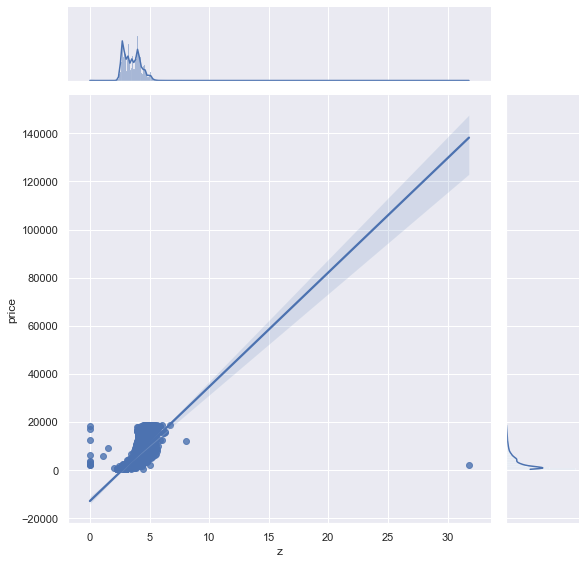

In [38]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('z', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

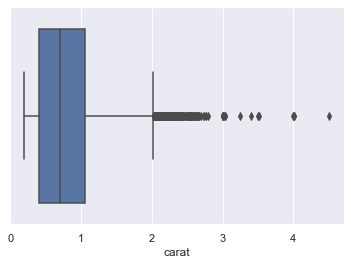

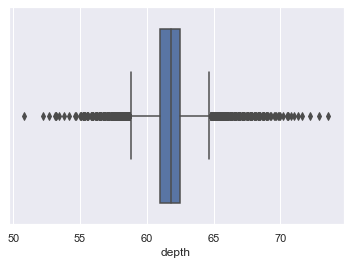

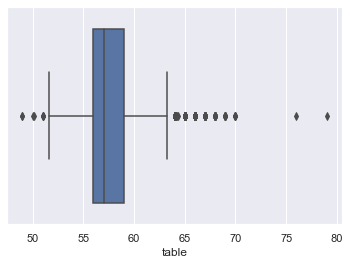

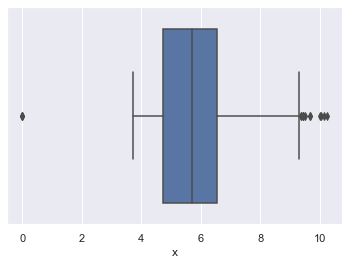

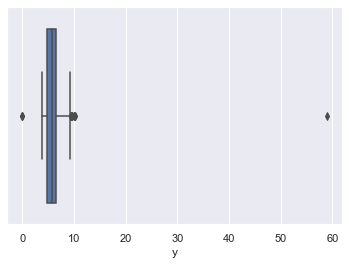

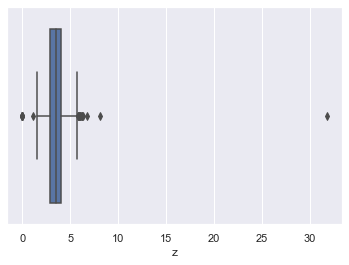

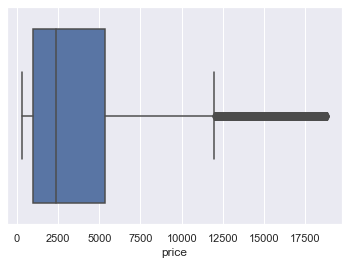

In [39]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [40]:
### Data Distribution

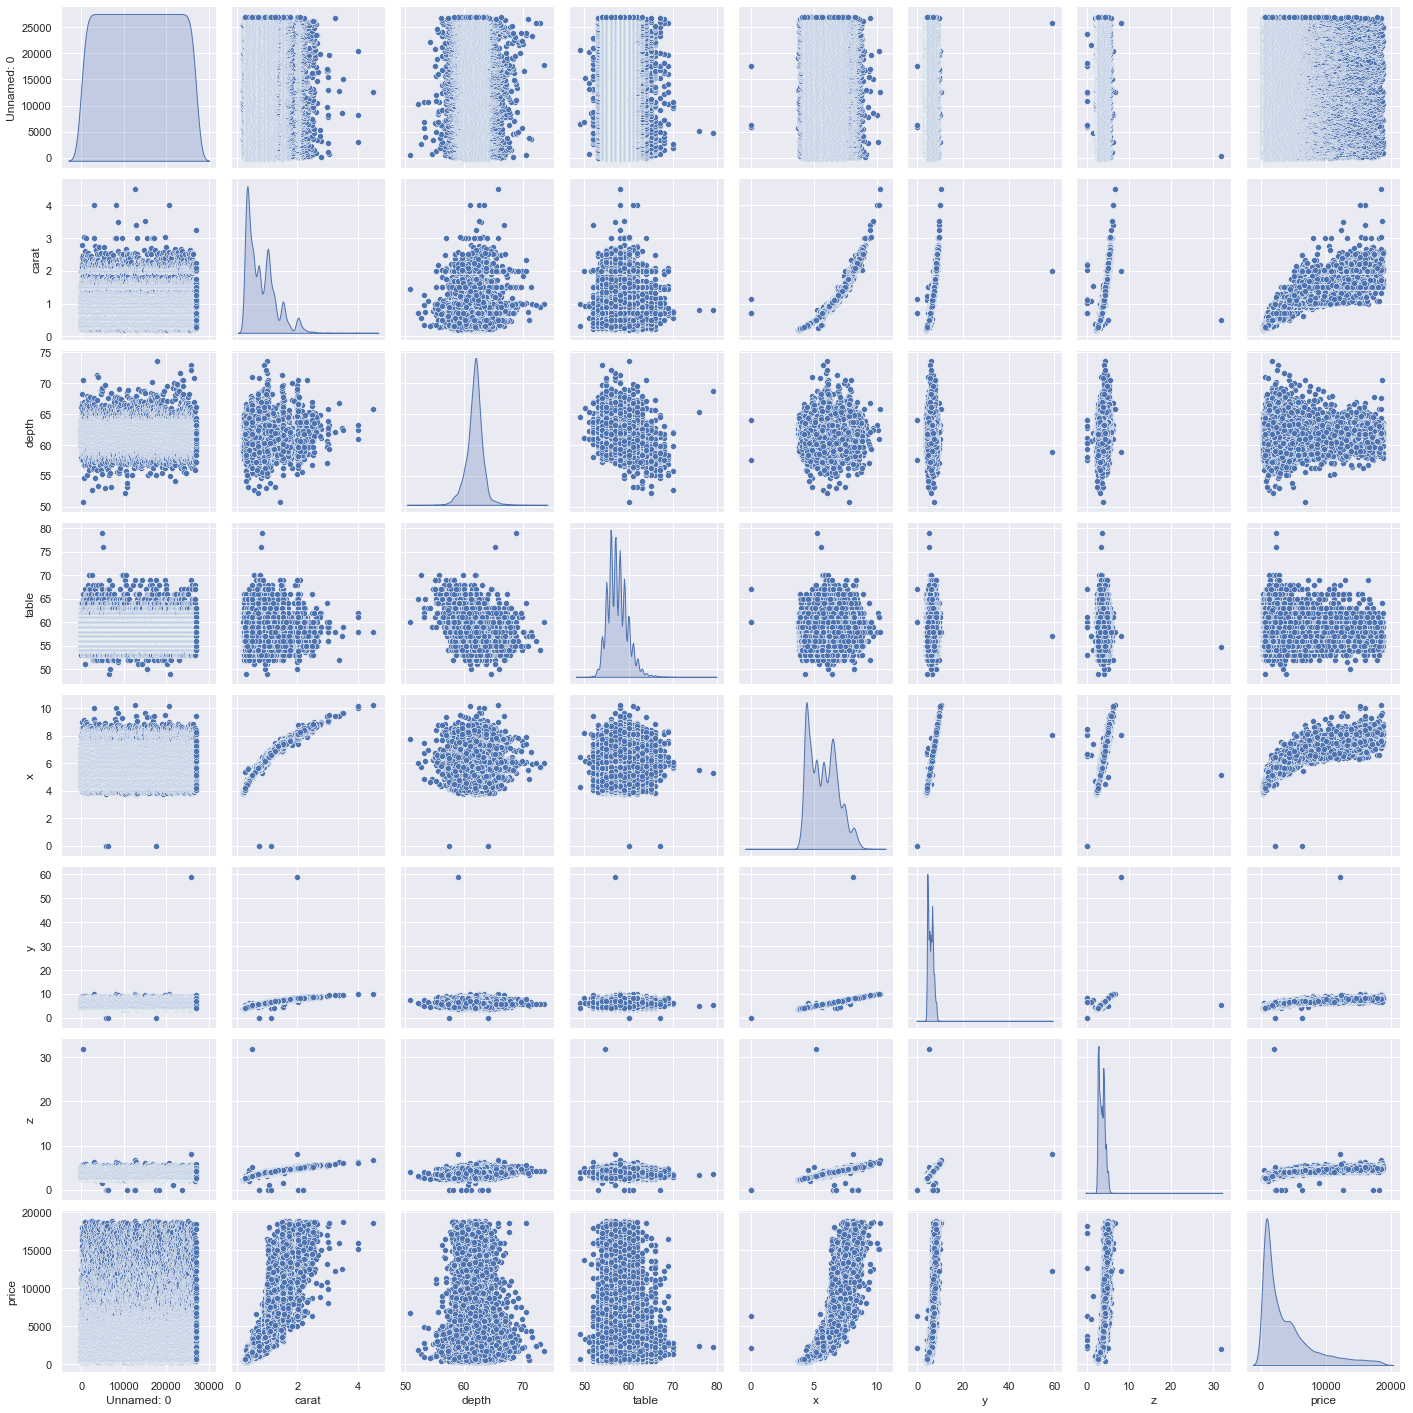

In [41]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

In [42]:
### checking for Correlations 

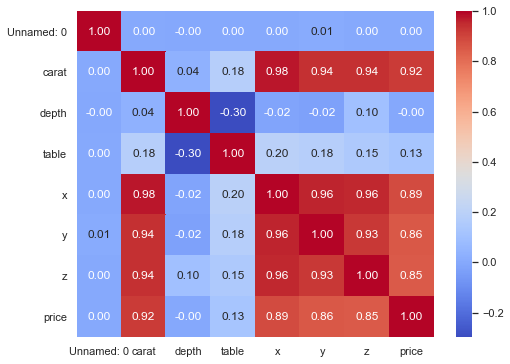

In [43]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [44]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [45]:
df[df.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [46]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [47]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [48]:
df[df.isin([0])].stack(0)

Series([], dtype: object)

In [49]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [50]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

In [52]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


### Outlier Checks

In [53]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

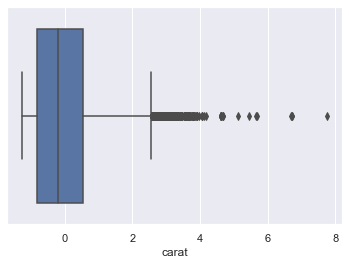

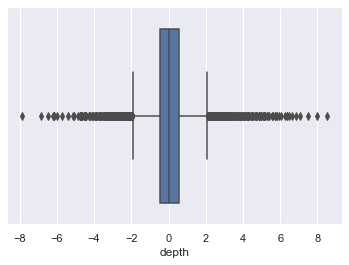

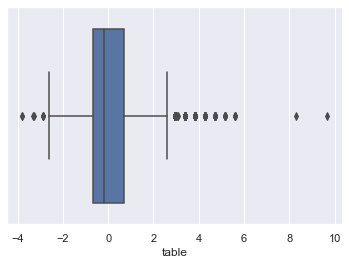

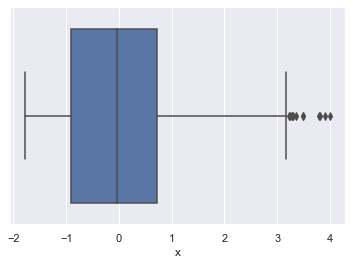

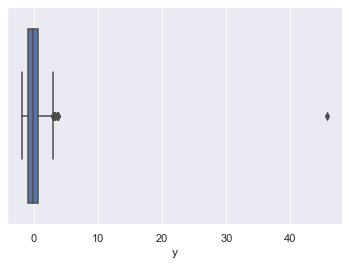

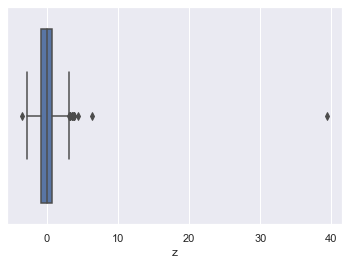

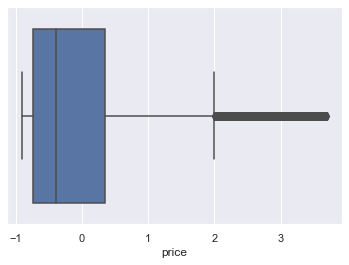

In [54]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [55]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [56]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [57]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

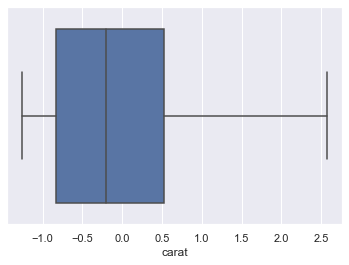

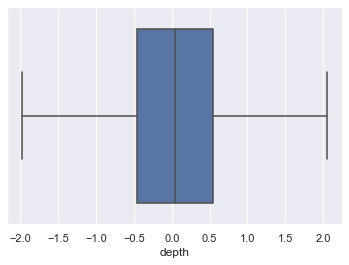

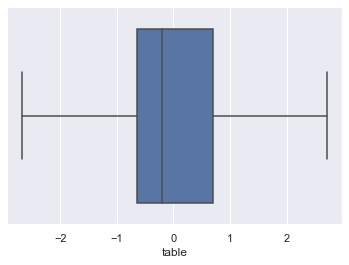

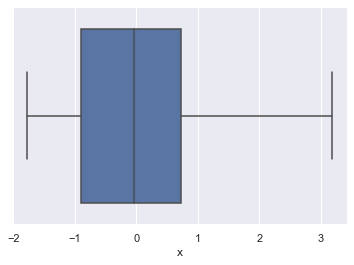

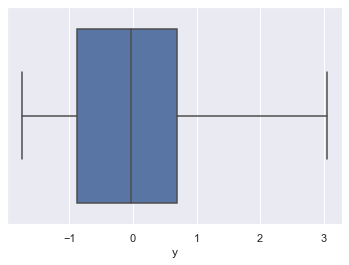

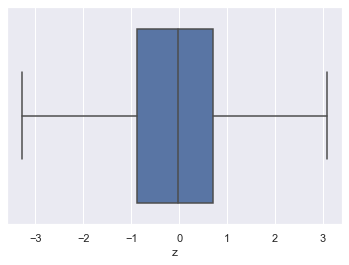

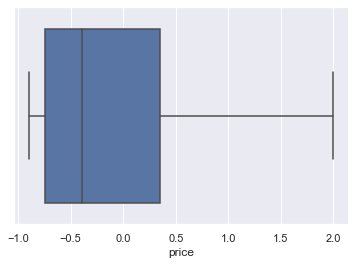

In [58]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

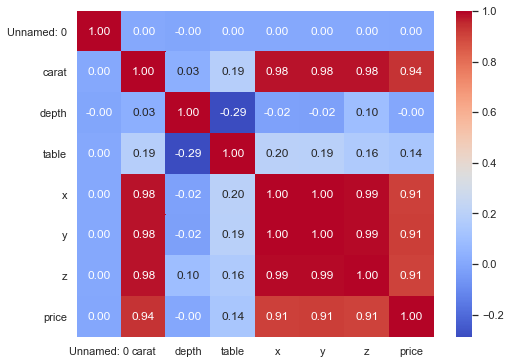

In [59]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [60]:
### Converting categorical to dummy variables in data

In [61]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [62]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [63]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

### Train/ Test split

In [64]:
# drop the id column as it is useless for the model
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [65]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [66]:
data_model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
# Copy all the predictor variables into X dataframe
X = data_model.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data_model[['price']]

In [68]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
X.shape

(26958, 23)

In [70]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [71]:
y.shape

(26958, 1)

In [72]:
# Split X and y into training and test set in 70:30 ratio

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Linear Regression Model

In [74]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804501
The coefficient for depth is 0.005605143445570377
The coefficient for table is -0.013319500386804035
The coefficient for x is -0.30504349819633475
The coefficient for y is 0.30391448957926553
The coefficient for z is -0.13916571567987943
The coefficient for cut_Good is 0.09403402912977911
The coefficient for cut_Ideal is 0.1523107462056746
The coefficient for cut_Premium is 0.14852774839849378
The coefficient for cut_Very Good is 0.12583881878452705
The coefficient for color_E is -0.04705442233369822
The coefficient for color_F is -0.06268437439142825
The coefficient for color_G is -0.10072161838356786
The coefficient for color_H is -0.20767313311661612
The coefficient for color_I is -0.3239541927462737
The coefficient for color_J is -0.46858930275015803
The coefficient for clarity_IF is 0.9997691394634902
The coefficient for clarity_SI1 is 0.6389785818271332
The coefficient for clarity_SI2 is 0.42959662348315514
The coefficient for clari

In [76]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.756762786304939


In [77]:
# R square on training data
regression_model.score(X_train, y_train)

0.9419557931252712

In [78]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9381643998102491

In [79]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20690072466418796

In [80]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21647817772382869

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [83]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 33.35086119845924
depth ---> 4.573918951598579
table ---> 1.7728852812618958
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.609618194943713
cut_Ideal ---> 14.34812508118844
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723695
color_E ---> 2.371070464762613


In [84]:
### Using Statsmodel library

In [85]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [86]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [87]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [88]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [89]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [90]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:48:39   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

In [91]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [92]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.21647817772382863

In [93]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9381643998102491

In [94]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

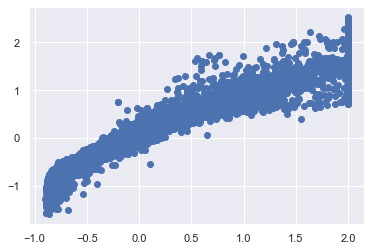

In [95]:
plt.scatter(y_test['price'], y_pred)

In [96]:
### ITERATION 2

In [97]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.756657
carat            1.101954
table           -0.013928
x               -0.315617
y                0.283420
z               -0.108789
cut_Good         0.095123
cut_Ideal        0.151173
cut_Premium      0.147355
cut_Very_Good    0.125514
color_E         -0.047114
color_F         -0.062727
color_G         -0.100657
color_H         -0.207568
color_I         -0.323689
color_J         -0.468428
clarity_IF       1.000046
clarity_SI1      0.639804
clarity_SI2      0.430195
clarity_VS1      0.838626
clarity_VS2      0.766683
clarity_VVS1     0.942390
clarity_VVS2     0.931898
dtype: float64

In [98]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:48:40   Log-Likelihood:                 2953.5
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18847   BIC:                            -5680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      0.016    -46.991

In [104]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [110]:
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
26809,0.443495,0.109928,-0.204081,0.559065,0.580741,0.572231,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.122708
10087,0.024729,0.038193,-1.100465,0.212920,0.254370,0.237888,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.082442
22817,-0.812804,0.181664,-0.652273,-0.852144,-0.793452,-0.793005,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.689067
21676,0.045667,0.396869,-0.652273,0.204044,0.245781,0.265750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.272740
14846,0.694754,0.683810,-0.204081,0.816456,0.812636,0.892644,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.642930


In [100]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [101]:
mse

0.04280790986656613

In [102]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.206900724664188

In [119]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (-0.01) * table + (-0.32) * x + (0.28) * y + (-0.11) * z + (0.1) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

In [121]:
### THE END